### Load data
***

In [1]:
import os.path
from collections import Counter

import numpy as np


data_dir = "data"
X_test = np.load(os.path.join(data_dir, "X_test.npy"))
y_test = np.load(os.path.join(data_dir, "y_test.npy"))
person_test = np.load(os.path.join(data_dir, "person_test.npy")).squeeze(axis=1)
X_train_valid = np.load(os.path.join(data_dir, "X_train_valid.npy"))
y_train_valid = np.load(os.path.join(data_dir, "y_train_valid.npy"))
person_train_valid = np.load(
    os.path.join(data_dir, "person_train_valid.npy")
).squeeze(axis=1)

n_class = len(set(y_train_valid))
min_y = min(y_train_valid)
y_train_valid = y_train_valid - min_y
y_test = y_test - min_y

In [2]:
X_train_valid.shape, y_train_valid.shape, person_train_valid.shape

((2115, 22, 1000), (2115,), (2115,))

In [3]:
Counter(y_train_valid), Counter(person_train_valid)

(Counter({2: 543, 3: 530, 0: 529, 1: 513}),
 Counter({0.0: 237,
          1.0: 236,
          2.0: 236,
          3.0: 234,
          4.0: 235,
          5.0: 236,
          6.0: 238,
          7.0: 232,
          8.0: 231}))

In [4]:
X_test.shape, y_test.shape, person_test.shape

((443, 22, 1000), (443,), (443,))

In [ ]:
Counter(y_test), Counter(person_test)

### Fix random seed and device
***

In [5]:
import random

import torch


seed = 1
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

device = torch.device("cuda:2")
device

device(type='cuda', index=2)

### Optimize accuracy for subject 1
***

In [6]:
from models import CNN, CRNN, MLP
from trainer import evaluate_and_get_prediction, fit


n_trial = 5

In [7]:
s1_indices_train = [i for i, s in enumerate(person_train_valid) if s == 1]
s1_indices_test = [i for i, s in enumerate(person_test) if s == 1]
X_train_valid_s1 = X_train_valid[s1_indices_train]
y_train_valid_s1 = y_train_valid[s1_indices_train]
X_test_s1 = X_test[s1_indices_test]
y_test_s1 = y_test[s1_indices_test]

In [8]:
valid_accs = []
test_accs = []

for i in range(n_trial):
    mlp = MLP(input_size=X_train_valid_s1.shape[1:], output_size=n_class).to(device)
    valid_acc = fit(mlp, X_train_valid_s1, y_train_valid_s1, device, random_state=i)
    test_acc, _ = evaluate_and_get_prediction(mlp, X_test_s1, y_test_s1, device)
    valid_accs.append(valid_acc)
    test_accs.append(test_acc)

round(np.mean(valid_accs), 5), round(np.mean(test_accs), 5)

  0%|          | 0/10 [00:00<?, ?it/s]

Best valid accuracy: 0.375


  0%|          | 0/10 [00:00<?, ?it/s]

Best valid accuracy: 0.33333


  0%|          | 0/10 [00:00<?, ?it/s]

Best valid accuracy: 0.33333


  0%|          | 0/10 [00:00<?, ?it/s]

Best valid accuracy: 0.39583


  0%|          | 0/10 [00:00<?, ?it/s]

Best valid accuracy: 0.39583


(0.36666, 0.324)

In [9]:
valid_accs = []
test_accs = []

for i in range(n_trial):
    cnn = CNN(input_size=X_train_valid_s1.shape[1:], output_size=n_class).to(device)
    valid_acc = fit(
        cnn, X_train_valid_s1, y_train_valid_s1, device, epochs=50, random_state=i
    )
    test_acc, _ = evaluate_and_get_prediction(cnn, X_test_s1, y_test_s1, device)
    valid_accs.append(valid_acc)
    test_accs.append(test_acc)

round(np.mean(valid_accs), 5), round(np.mean(test_accs), 5)

  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.5


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.35417


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.35417


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.41667


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.45833


(0.41667, 0.404)

In [10]:
valid_accs = []
test_accs = []

for i in range(n_trial):
    crnn = CRNN(output_size=n_class, use_attention=False).to(device)
    valid_acc = fit(
        crnn, X_train_valid_s1, y_train_valid_s1, device, epochs=50, random_state=i
    )
    test_acc, _ = evaluate_and_get_prediction(crnn, X_test_s1, y_test_s1, device)
    valid_accs.append(valid_acc)
    test_accs.append(test_acc)

round(np.mean(valid_accs), 5), round(np.mean(test_accs), 5)

  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.47917


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.5


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.52083


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.39583


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.54167


(0.4875, 0.352)

In [11]:
valid_accs = []
test_accs = []

for i in range(n_trial):
    crnn = CRNN(output_size=n_class, use_attention=True).to(device)
    valid_acc = fit(
        crnn, X_train_valid_s1, y_train_valid_s1, device, epochs=50, random_state=i
    )
    test_acc, _ = evaluate_and_get_prediction(crnn, X_test_s1, y_test_s1, device)
    valid_accs.append(valid_acc)
    test_accs.append(test_acc)

round(np.mean(valid_accs), 5), round(np.mean(test_accs), 5)

  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.41667


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.47917


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.45833


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.39583


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.45833


(0.44167, 0.376)

### Optimize accuracy for all subjects
***

In [12]:
valid_accs = []
test_accs_s1 = []
test_accs_all = []

for i in range(n_trial):
    mlp = MLP(input_size=X_train_valid.shape[1:], output_size=n_class).to(device)
    valid_acc = fit(mlp, X_train_valid, y_train_valid, device, random_state=i)
    test_acc_s1, _ = evaluate_and_get_prediction(mlp, X_test_s1, y_test_s1, device)
    test_acc_all, _ = evaluate_and_get_prediction(mlp, X_test, y_test, device)
    valid_accs.append(valid_acc)
    test_accs_s1.append(test_acc_s1)
    test_accs_all.append(test_acc_all)

(
    round(np.mean(valid_accs), 5),
    round(np.mean(test_accs_s1), 5),
    round(np.mean(test_accs_all), 5),
)

  0%|          | 0/10 [00:00<?, ?it/s]

Best valid accuracy: 0.32388


  0%|          | 0/10 [00:00<?, ?it/s]

Best valid accuracy: 0.35225


  0%|          | 0/10 [00:00<?, ?it/s]

Best valid accuracy: 0.36643


  0%|          | 0/10 [00:00<?, ?it/s]

Best valid accuracy: 0.35934


  0%|          | 0/10 [00:00<?, ?it/s]

Best valid accuracy: 0.3357


(0.34752, 0.284, 0.34086)

In [13]:
valid_accs = []
test_accs_s1 = []
test_accs_all = []

for i in range(n_trial):
    cnn = CNN(input_size=X_train_valid.shape[1:], output_size=n_class).to(device)
    valid_acc = fit(cnn, X_train_valid, y_train_valid, device, epochs=50, random_state=i)
    test_acc_s1, _ = evaluate_and_get_prediction(cnn, X_test_s1, y_test_s1, device)
    test_acc_all, _ = evaluate_and_get_prediction(cnn, X_test, y_test, device)
    valid_accs.append(valid_acc)
    test_accs_s1.append(test_acc_s1)
    test_accs_all.append(test_acc_all)

(
    round(np.mean(valid_accs), 5),
    round(np.mean(test_accs_s1), 5),
    round(np.mean(test_accs_all), 5),
)

  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.55319


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.61229


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.60284


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.61939


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.62648


(0.60284, 0.452, 0.60226)

In [17]:
valid_accs = []
test_accs_s1 = []
test_accs_all = []

for i in range(n_trial):
    crnn = CRNN(output_size=n_class, use_attention=False).to(device)
    valid_acc = fit(crnn, X_train_valid, y_train_valid, device, epochs=50, random_state=i)
    test_acc_s1, _ = evaluate_and_get_prediction(crnn, X_test_s1, y_test_s1, device)
    test_acc_all, _ = evaluate_and_get_prediction(crnn, X_test, y_test, device)
    valid_accs.append(valid_acc)
    test_accs_s1.append(test_acc_s1)
    test_accs_all.append(test_acc_all)

(
    round(np.mean(valid_accs), 5),
    round(np.mean(test_accs_s1), 5),
    round(np.mean(test_accs_all), 5),
)

  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.60284


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.58629


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.58629


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.58156


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.54137


(0.57967, 0.444, 0.52235)

In [16]:
valid_accs = []
test_accs_s1 = []
test_accs_all = []

for i in range(n_trial):
    crnn = CRNN(output_size=n_class, use_attention=True).to(device)
    valid_acc = fit(crnn, X_train_valid, y_train_valid, device, epochs=50, random_state=i)
    test_acc_s1, _ = evaluate_and_get_prediction(crnn, X_test_s1, y_test_s1, device)
    test_acc_all, _ = evaluate_and_get_prediction(crnn, X_test, y_test, device)
    valid_accs.append(valid_acc)
    test_accs_s1.append(test_acc_s1)
    test_accs_all.append(test_acc_all)

(
    round(np.mean(valid_accs), 5),
    round(np.mean(test_accs_s1), 5),
    round(np.mean(test_accs_all), 5),
)

  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.5721


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.58629


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.57447


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.58865


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.60047


(0.5844, 0.452, 0.56479)

### Compared training data with different lengths of time
***

In [17]:
ls = list(range(300, 1001, 50))
valid_accs = {"CNN": [], "CRNN": [], "AttnCRNN": []}
test_accs = {"CNN": [], "CRNN": [], "AttnCRNN": []}

for l in ls:
    print(f"{l=}")
    X_train_valid_sub = X_train_valid[:, :, :l]
    X_test_sub = X_test[:, :, :l]

    # CNN
    cnn = CNN(input_size=X_train_valid_sub.shape[1:], output_size=n_class).to(device)
    valid_acc = fit(cnn, X_train_valid_sub, y_train_valid, device, epochs=50)
    test_acc, _ = evaluate_and_get_prediction(cnn, X_test_sub, y_test, device)
    valid_accs["CNN"].append(valid_acc)
    test_accs["CNN"].append(test_acc)
    
    # CRNN
    crnn = CRNN(output_size=n_class, use_attention=False).to(device)
    valid_acc = fit(crnn, X_train_valid_sub, y_train_valid, device, epochs=50)
    test_acc, _ = evaluate_and_get_prediction(crnn, X_test_sub, y_test, device)
    valid_accs["CRNN"].append(valid_acc)
    test_accs["CRNN"].append(test_acc)
    
    # AttnCRNN
    crnn = CRNN(output_size=n_class, use_attention=True).to(device)
    valid_acc = fit(crnn, X_train_valid_sub, y_train_valid, device, epochs=50)
    test_acc, _ = evaluate_and_get_prediction(crnn, X_test_sub, y_test, device)
    valid_accs["AttnCRNN"].append(valid_acc)
    test_accs["AttnCRNN"].append(test_acc)

test_accs

l=300


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.63357


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.59574


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.58865
l=350


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.65012


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.61702


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.56974
l=400


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.62411


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.60047


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.56028
l=450


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.68085


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.59574


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.6052
l=500


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.64775


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.59574


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.62175
l=550


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.64303


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.63121


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.60284
l=600


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.6383


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.61702


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.58629
l=650


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.62175


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.63593


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.60047
l=700


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.61229


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.59338


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.59338
l=750


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.58865


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.63121


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.60284
l=800


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.57447


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.61466


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.59574
l=850


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.59574


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.62175


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.5721
l=900


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.5721


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.64066


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.59102
l=950


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.59102


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.55556


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.60757
l=1000


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.57683


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.59338


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.62884


{'CNN': [0.60271,
  0.62528,
  0.614,
  0.65237,
  0.64108,
  0.62528,
  0.65688,
  0.65688,
  0.62302,
  0.6298,
  0.56659,
  0.65237,
  0.64108,
  0.63883,
  0.63205],
 'CRNN': [0.56433,
  0.56659,
  0.58916,
  0.57336,
  0.54628,
  0.57336,
  0.614,
  0.62077,
  0.54176,
  0.60497,
  0.58239,
  0.60045,
  0.58239,
  0.55982,
  0.57788],
 'AttnCRNN': [0.51919,
  0.5395,
  0.49436,
  0.59142,
  0.57336,
  0.54628,
  0.5553,
  0.55982,
  0.56659,
  0.58916,
  0.56659,
  0.54176,
  0.52144,
  0.55982,
  0.60045]}

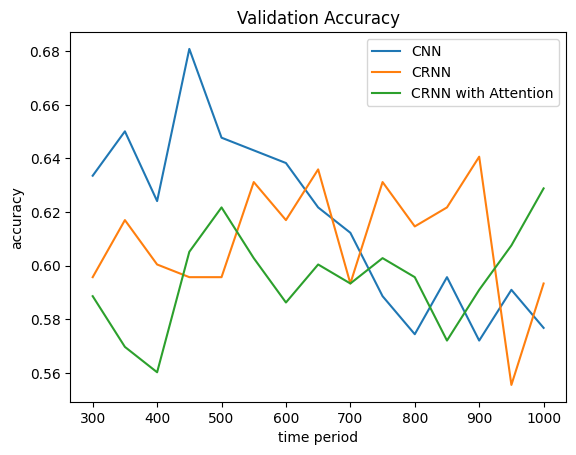

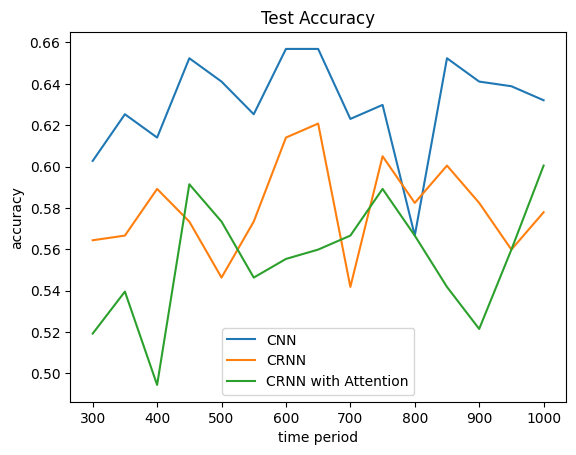

In [18]:
import matplotlib.pyplot as plt


def plot_accuracies(ls, accs, data_type):
    plt.plot(ls, accs["CNN"], label="CNN")
    plt.plot(ls, accs["CRNN"], label="CRNN")
    plt.plot(ls, accs["AttnCRNN"], label="CRNN with Attention")
    plt.title(f"{data_type} Accuracy")
    plt.xlabel("time period")
    plt.ylabel("accuracy")
    plt.legend()
    plt.show()


plot_accuracies(ls, valid_accs, "Validation")
plot_accuracies(ls, test_accs, "Test")

In [19]:
optimal_ls = {k: ls[np.argmax(v)] for k, v in valid_accs.items()}
optimal_ls

{'CNN': 450, 'CRNN': 900, 'AttnCRNN': 1000}

### Ensemble models
***

In [20]:
def get_model_prediction(model, l, random_state):
    X_train_valid_sub = X_train_valid[:, :, :l]
    X_test_sub = X_test[:, :, :l]
    fit(
        model,
        X_train_valid_sub,
        y_train_valid,
        device,
        epochs=50,
        random_state=random_state,
    )
    _, y_pred = evaluate_and_get_prediction(model, X_test_sub, y_test, device)
    return y_pred


n_model = 33
model2y_preds = {"CNN": [], "CRNN": [], "AttnCRNN": []}

for i in range(0, n_model * 3, 3):
    # CNN
    cnn = CNN(input_size=(22, optimal_ls["CNN"]), output_size=n_class).to(device)
    y_pred = get_model_prediction(cnn, l=optimal_ls["CNN"], random_state=i)
    model2y_preds["CNN"].append(y_pred)
    
    # CRNN
    crnn = CRNN(output_size=n_class, use_attention=False).to(device)
    y_pred = get_model_prediction(crnn, l=optimal_ls["CRNN"], random_state=i+1)
    model2y_preds["CRNN"].append(y_pred)
    
    # AttnCRNN
    crnn = CRNN(output_size=n_class, use_attention=True).to(device)
    y_pred = get_model_prediction(crnn, l=optimal_ls["AttnCRNN"], random_state=i+2)
    model2y_preds["AttnCRNN"].append(y_pred)

  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.63593


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.61466


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.59102


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.67849


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.61702


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.59338


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.65485


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.60047


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.59102


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.68794


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.59102


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.62648


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.65957


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.60757


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.58865


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.69031


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.6383


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.56738


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.70449


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.59811


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.62175


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.66903


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.65957


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.65957


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.6643


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.59811


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.64066


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.6643


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.5792


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.62175


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.64303


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.65957


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.63593


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.66194


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.60757


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.61702


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.6643


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.6052


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.59574


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.66194


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.59811


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.61939


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.63593


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.64539


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.60284


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.66194


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.65248


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.60047


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.69031


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.60284


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.63121


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.65721


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.65957


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.59338


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.65012


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.60993


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.60047


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.65012


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.62411


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.61466


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.69031


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.58865


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.59574


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.64066


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.60284


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.63357


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.69267


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.65012


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.62175


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.68322


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.62648


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.57683


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.67376


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.62884


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.62648


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.67139


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.59811


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.61702


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.61702


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.62411


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.6383


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.65721


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.59102


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.61702


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.67612


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.59102


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.62411


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.63593


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.62648


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.62175


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.65485


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.59338


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.59102


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.66667


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.63357


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.63121


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.63121


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.65485


  0%|          | 0/50 [00:00<?, ?it/s]

Best valid accuracy: 0.61229


In [21]:
def get_majority_vote_prediction(y_preds):
    y_preds_array = np.array(y_preds).T
    return [Counter(y_pred).most_common(1)[0][0] for y_pred in y_preds_array]


def compute_test_accuracy(y_pred):
    return round((np.array(y_pred) == y_test).mean(), 5)

Best accuracy of CNN: 0.68849, with 25 models.
Best accuracy of CRNN: 0.6614, with 31 models.
Best accuracy of AttnCRNN: 0.67494, with 33 models.


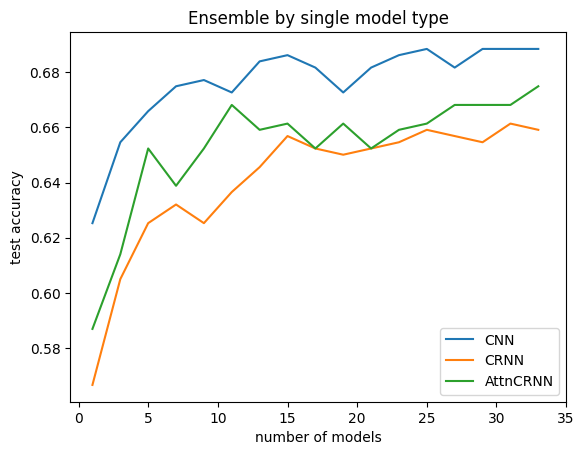

In [26]:
n_models = list(range(1, n_model + 1, 2))

for model_type, y_preds in model2y_preds.items():
    test_accs = []
    for n_model in n_models:
        y_pred = get_majority_vote_prediction(y_preds[:n_model])
        test_accs.append(compute_test_accuracy(y_pred))
    plt.plot(n_models, test_accs, label=model_type)
    max_i = np.argmax(test_accs)
    print(
        f"Best accuracy of {model_type}: {test_accs[max_i]}, "
        f"with {n_models[max_i]} models."
    )

plt.title("Ensemble by single model type")
plt.xlabel("number of models")
plt.ylabel("test accuracy")
plt.xticks(list(range(0, 36, 5)))
plt.legend()
plt.show()

Best accuracy: 0.73363, with 69 models.


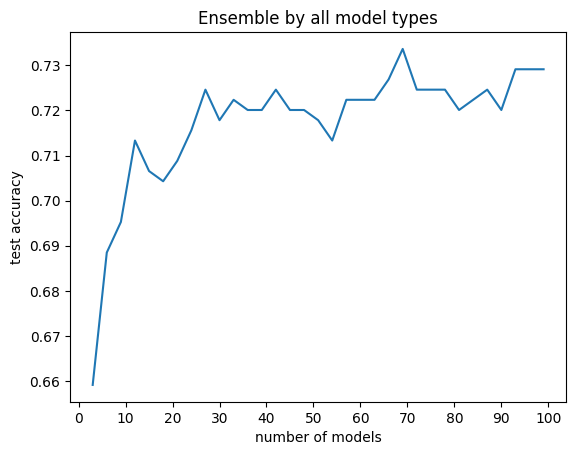

In [28]:
n_models = list(range(1, n_model+1))
test_accs = []

for i in n_models:
    y_preds_all = []
    for y_preds in model2y_preds.values():
        y_preds_all += y_preds[:i]
    y_pred = get_majority_vote_prediction(y_preds_all)
    test_accs.append(compute_test_accuracy(y_pred))

max_i = np.argmax(test_accs)
print(
    f"Best accuracy: {test_accs[max_i]}, "
    f"with {n_models[max_i]*3} models."
)

plt.plot(np.array(n_models)*3, test_accs)
plt.title("Ensemble by all model types")
plt.xlabel("number of models")
plt.ylabel("test accuracy")
plt.xticks(list(range(0, 101, 10)))
plt.show()

Best accuracy of AttnCRNN and CRNN: 0.68397, with 56 models.


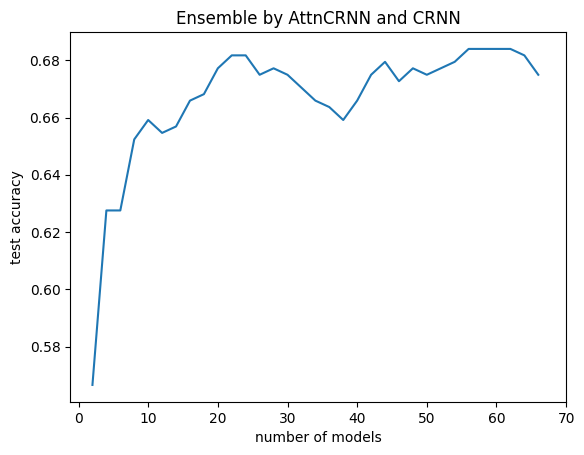

Best accuracy of AttnCRNN and CNN: 0.73138, with 60 models.


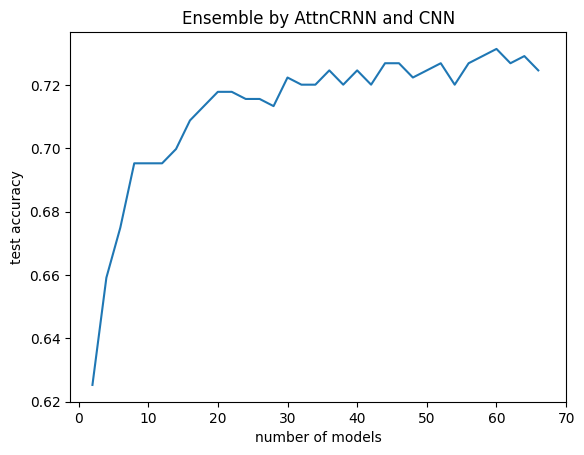

Best accuracy of CRNN and CNN: 0.73589, with 64 models.


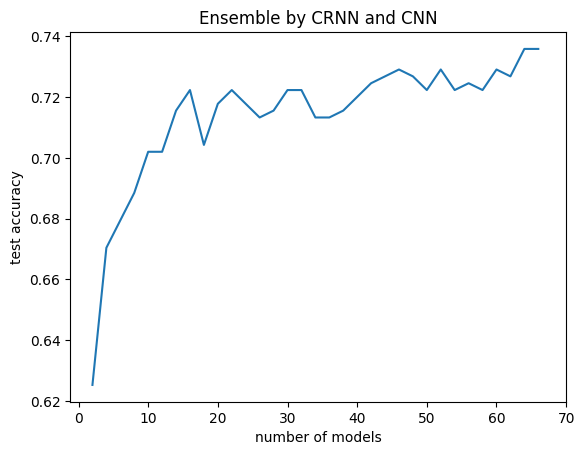

In [29]:
n_models = list(range(1, n_model+1))

for excluded_model in model2y_preds:
    test_accs = []
    included_models = set()

    for i in n_models:
        y_preds_all = []
        for model_type, y_preds in model2y_preds.items():
            if model_type != excluded_model:
                included_models.add(model_type)
                y_preds_all += y_preds[:i]
        y_pred = get_majority_vote_prediction(y_preds_all)
        test_accs.append(compute_test_accuracy(y_pred))

    included_models = " and ".join(list(included_models))
    
    max_i = np.argmax(test_accs)
    print(
        f"Best accuracy of {included_models}: {test_accs[max_i]}, "
        f"with {n_models[max_i]*2} models."
    )

    plt.plot(np.array(n_models)*2, test_accs)
    plt.title(f"Ensemble by {included_models}")
    plt.xlabel("number of models")
    plt.ylabel("test accuracy")
    plt.xticks(list(range(0, 71, 10)))
    plt.show()